<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE255-DataMining/blob/main/DM_Assignment_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step-by-Step Guide to Implementing K-Means Clustering

## 1. Understanding the Dataset
First, we need to understand the structure of the dataset, including the types of attributes it contains and which of them are suitable for clustering.

## 2. Data Preprocessing
This step involves:

- Loading the dataset.
- Handling missing values.
- Selecting relevant features for clustering.
- Normalizing the data if necessary.

## 3. Implementing K-Means Algorithm
The core steps of the K-Means algorithm are:

- Initializing cluster centers (centroids).
- Assigning data points to the nearest centroid.
- Recalculating centroids based on the assigned points.
- Iterating the process until convergence.

## 4. Evaluating the Clusters
To assess the quality of the clusters, we can use metrics like Within-Cluster-Sum-of-Squares (WCSS).

## 5. Visualization
Visualizing the clusters and centroids for better interpretation.

Let's start with loading the dataset and exploring its contents:

In [9]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Sem1/CMPE255 - Data Mining/Assignment 6/Airplane_Crashes_and_Fatalities_Since_1908.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display dataset summary
print(data.info())

         Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0   
1          NaN   NaN     5.0         5.0     0.0   
2          NaN   NaN

Based on the dataset's structure, we can observe several attributes. For K-Means clustering, it's advisable to use numerical data. Therefore, the columns 'Aboard', 'Fatalities', and 'Ground' are suitable candidates. We can cluster the data to find patterns in crash severity or impact.

## Data Preprocessing
- **Handling Missing Values:** We will fill missing numerical values with the mean of their respective columns.
- **Feature Selection:** We'll use 'Aboard', 'Fatalities', and 'Ground' for clustering.
- **Normalization:** It's crucial to scale the features to ensure equal weighting in the clustering process.

## Implementing K-Means Algorithm
- **Initialization:** We'll randomly initialize centroids.
- **Assignment Step:** Assign each data point to the nearest centroid.
- **Update Step:** Recalculate centroids.
- **Convergence Check:** Repeat steps 2 and 3 until convergence.

Let's implement these steps:

In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin

# Handling missing values
data.fillna({'Aboard': data['Aboard'].mean(), 'Fatalities': data['Fatalities'].mean(), 'Ground': data['Ground'].mean()}, inplace=True)

# Feature selection
features = data[['Aboard', 'Fatalities', 'Ground']]

# Normalization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Implementing K-Means
def k_means(X, n_clusters, rseed=2):
    # Step 1: Randomly initialize centroids
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # Step 2: Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # Step 3: Find new centers from means of points
        new_centers = np.array([X[labels == j].mean(0) for j in range(n_clusters)])

        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

# Running K-Means
centers, labels = k_means(features_scaled, n_clusters=3)

# Printing the resulting centroids
print("Centroids:\n", centers)

Centroids:
 [[-0.3481678  -0.32066992 -0.02005767]
 [ 3.66276127  3.59931908  0.52781819]
 [ 0.94675683  0.82061913 -0.01751224]]


The output shows the centroids of three clusters when applying K-Means to your dataset. Each centroid is a point in a three-dimensional space defined by the scaled values of 'Aboard', 'Fatalities', and 'Ground'. The dimensions correspond to these features respectively.

### Interpreting the Centroids
- **First Centroid (-0.35, -0.32, -0.02):** Represents the cluster with relatively low numbers of people aboard, fatalities, and ground casualties. This could be indicative of less severe crashes.
- **Second Centroid (3.66, 3.60, 0.53):** Corresponds to a cluster with significantly higher values in all three dimensions, suggesting major crashes with high numbers of aboard, fatalities, and ground casualties.
- **Third Centroid (0.95, 0.82, -0.02):** Indicates a cluster with moderate numbers of aboard and fatalities but low ground casualties. These might be medium-severity crashes.

### Visualization
To better understand the clusters, let's create a 2D plot. Since we cannot plot all three dimensions easily, we'll pick two (e.g., 'Aboard' and 'Fatalities') for a scatter plot:

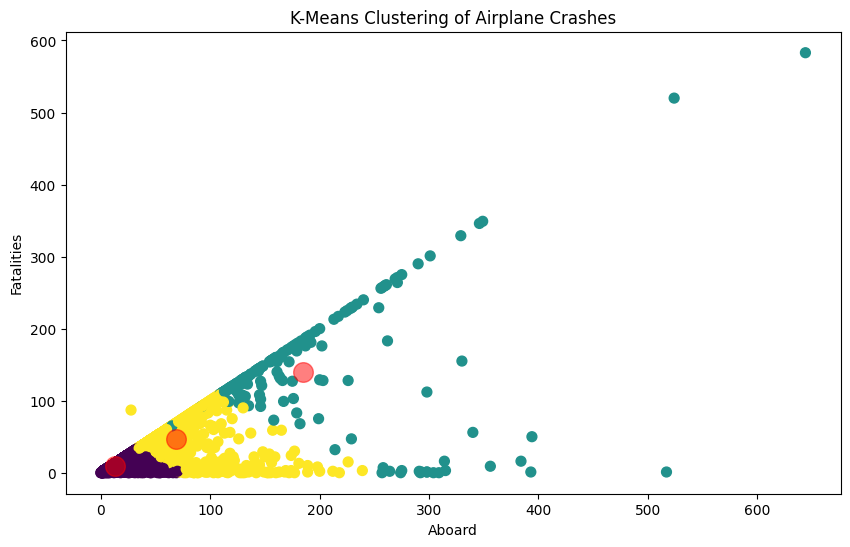

In [11]:
import matplotlib.pyplot as plt

# Convert the scaled features back to original scale for better interpretation
features_original = scaler.inverse_transform(features_scaled)

# Extracting the features for plotting
aboard = features_original[:, 0]
fatalities = features_original[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(aboard, fatalities, c=labels, s=50, cmap='viridis')

# Plotting the centroids
centers_original = scaler.inverse_transform(centers)
plt.scatter(centers_original[:, 0], centers_original[:, 1], c='red', s=200, alpha=0.5)

plt.xlabel('Aboard')
plt.ylabel('Fatalities')
plt.title('K-Means Clustering of Airplane Crashes')
plt.show()